## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

## Read and Explore the Data

#### Read RegData csv file into numpy array
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
data = np.genfromtxt('RegData.csv', delimiter=',', dtype=None)

#### Explore data

In [3]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

In [4]:
np.shape(data)

(13, 2)

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [5]:
X = data[:, 0]
y = data[:, 1]

In [6]:
print("Shape of X = ", np.shape(X))
print("independent variable : ", X)

Shape of X =  (13,)
independent variable :  [2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]


In [7]:
print("Shape of y = ", np.shape(y))
print("dependent variable : ", y)

Shape of y =  (13,)
dependent variable :  [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot the original data (scatter plot of X,y)

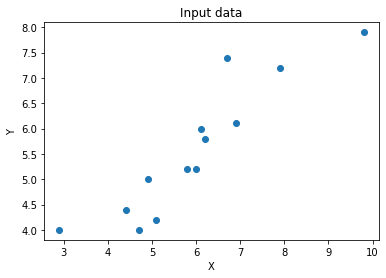

In [8]:
plt.scatter(X, y)
plt.xlabel('X'); plt.ylabel('Y');
plt.title('Input data');

## LR Full Implementation

### Step1: 
#### Initialize model parameters with zero.  
#### Choose value of the Learning rate. 

In [9]:
# Initialize parameters (theta_0 , theta_1)
theta = np.zeros(2)

# Choose the Learning rate
alpha = 0.02

# Number of ietation
num_iters = 1500

### Step2: Predict the output h(x) = theta_0 + theta_1 * x

In [10]:
def hypothesis(X, theta):
    h = theta[0] + X*theta[1]
    return h

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).

In [11]:
def cost_fun(y, h, m):
    J = (1/(2*m)) * np.sum((h - y)**2)
    return J

### Step4: Calculate the gradient.

In [12]:
def gradient(X, y, h, m):
    Gtheta_0 = (1/m) * np.sum((h - y))
    Gtheta_1 = (1/m) * np.sum((h - y) * X)
    return Gtheta_0, Gtheta_1

### Step5: Update the model parameters (simultaneously).

In [13]:
def update(theta, Gtheta_0, Gtheta_1, alpha):
    theta0_new = theta[0] - alpha * Gtheta_0
    theta1_new = theta[1] - alpha * Gtheta_1
    return theta0_new, theta1_new

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.

In [14]:
def GD(X, y, theta, alpha, num_iters, stopCriteria): 
    J_history = [] 
    theta_history = []
    m = y.size
    cost = 0
    for _ in range(num_iters):
        h = hypothesis(X, theta)
        J = cost_fun(y, h, m)
        if abs(cost-J) < stopCriteria:
            break
        cost = J

        grad_th0, grad_th1 = gradient(X, y, h, m)
        
        theta[0], theta[1] = update(theta, grad_th0, grad_th1, alpha)
        
        J_history.append(J)
        theta_history.append(theta)
    return theta_history, J_history

## Use GD model to predict y values 

In [15]:
theta_history, J_history = GD(X ,y, theta, alpha, num_iters, stopCriteria=1e-6)
optimal_theta = theta_history[-1]
y_pred = optimal_theta[0] + X*optimal_theta[1]

### Plot  LR equation output (fitted line) with the original data 

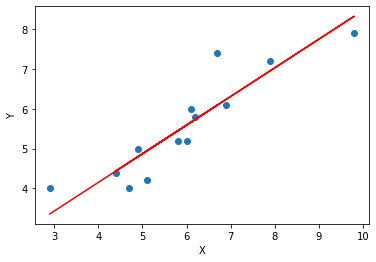

In [16]:
plt.scatter(X, y)
plt.xlabel('X'); plt.ylabel('Y');
plt.plot(X, y_pred, '-', color='r');

### Use R2 score to evaluate LR equation output

In [17]:
print("R2 Score = ", r2_score(y, y_pred))

R2 Score =  0.8201607622793285


## Plot loss vs. iterations

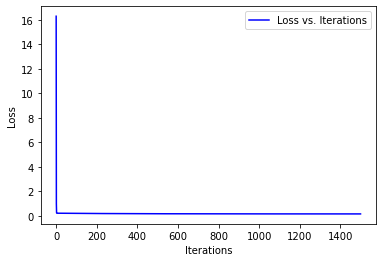

In [18]:
plt.plot(J_history, 'b', label='Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Compare results eith sklearn

In [19]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model
regr.fit(X.reshape(-1, 1), y)

LinearRegression()

In [20]:
# Make predictions using the trained model
y_pred = regr.predict(X.reshape(-1, 1))

# R2 score
print("R2 score = %.2f" % r2_score(y, y_pred))

R2 score = 0.82


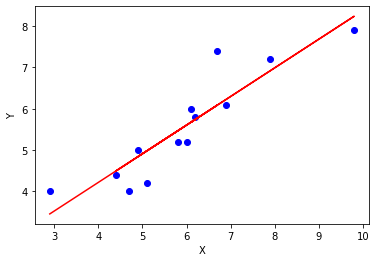

In [21]:
# Plot outputs
plt.scatter(X, y, color="b")
plt.plot(X, y_pred, color="r")
plt.xlabel('X'); plt.ylabel('Y');

plt.show()